introduction: This analysis aims to offer tactical guidance to a new movie studio based on trends in movie success. With the entertainment business evolving more studios and streaming platforms are targeting to invest in original content hence the need to know what drives the box office. This analysis will be used to look for patterns and trends from several data sets to enable the studio to make films that should prove financially successful.
Business Problem: 
The main objective is to provide the new movie studio with strategic recommendations that will be informed by the past performance of films. This will entail looking at different characteristics of films including genres and budgets and analyzing what aspects are most influential for box office outcomes. In this manner, we hope to use frequency distributions of these attributes to help steer the studio as to the kind of films to make.

In [69]:
# import relevant datasets

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

conn = sqlite3.connect('data/im.db')

%matplotlib inline


### Understanding the Datasets

#### BOM 

BOX OFFICE MOJO 
COLUMNS = **title | studio |domestic_gross |	foreign_gross |	year**

In [70]:
bom = pd.read_csv('data/bom.movie_gross.csv')
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [71]:
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [72]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### THE NUMBERS
COLS : release_date |	movie |	production_budget |	domestic_gross |	worldwide_gross

In [73]:
tn = pd.read_csv('data/tn.movie_budgets.csv')
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [74]:
tn.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [75]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [76]:
tn = tn.rename(columns={'movie': 'title'})


In [88]:
# merge tn and bom
pd.merge(tn, bom, on='title', how='left')

## upon merging the number of rows are reduced. 

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,804600000,2011.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",BV,459000000.0,946400000,2015.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,NaN,NaN,NaN,NaN
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",NaN,NaN,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",NaN,NaN,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,NaN,NaN,NaN,NaN


* BOM and TN have the same information.

* BOM has 3387 entries and has missing values while TN has 0 null and 5782 entries. 

- Opted for **TN**

#### IMDB
TABLES :
   movie_basics |
	directors |
	known_for |
	movie_akas |
	movie_ratings |
	persons |
	principals |
	writers |

In [78]:
pd.read_sql(\
    """
    SELECT *
    FROM sqlite_master 
     
     """
    
    
    , conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [79]:
pd.read_sql(\
    """
    SELECT *
    FROM movie_basics 
     
     """
    
    
    , conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [80]:
pd.read_sql(\
    """
    SELECT *
    FROM movie_ratings 
     
     """
    
    
    , conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [84]:
imdb = pd.read_sql(\
    """
    SELECT *
    FROM movie_basics
    LEFT JOIN movie_ratings 
        USING(movie_id) 
     
    """
    
    
    , conn)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [85]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


In [87]:
imdb.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

- runtime_minutes has 7620 of 73856 missing values. Less than 10% of the data. Drop missing rows
- genres has 804 of 73856 missing values. Less than 2% of the data. Drop missing rows

In [16]:
# drop missing values in runtime and genres
imdb = imdb.dropna()
imdb.info()

## No missing values. 

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [17]:
conn.close()

#### ROTTEN TOMATOES MOVIE INFO

COLS: id |	synopsis |	rating |	genre |	director |	writer |   theater_date |	dvd_date |	currency |	box_office |	runtime	studio

#### REVIEWS 


COLS =id |	review | rating |	fresh |	critic |	top_critic | publisher | date

In [18]:
rt = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
rt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [19]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


- Rotten Tomato movie_info has very few entries compared to imdb. The preferred cols, genre and run_time have very few rows compared to imdb

In [20]:
rt_review = pd.read_csv("data/rt.reviews.tsv", sep='\t', encoding='windows-1252')
rt_review

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [21]:
rt_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


- Merge rotten tomatoes movie_info with reviews.

In [22]:
rt_merged = pd.merge(rt, rt_review, on='id', how='inner')
rt_merged.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [23]:
rt_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   synopsis      54300 non-null  object
 2   rating_x      54346 non-null  object
 3   genre         54345 non-null  object
 4   director      48992 non-null  object
 5   writer        45206 non-null  object
 6   theater_date  53206 non-null  object
 7   dvd_date      53206 non-null  object
 8   currency      33310 non-null  object
 9   box_office    33310 non-null  object
 10  runtime       53594 non-null  object
 11  studio        40125 non-null  object
 12  review        48869 non-null  object
 13  rating_y      40915 non-null  object
 14  fresh         54432 non-null  object
 15  critic        51710 non-null  object
 16  top_critic    54432 non-null  int64 
 17  publisher     54123 non-null  object
 18  date          54432 non-null  object
dtypes: i

In [24]:
rt_merged.isna().sum()

id                  0
synopsis          132
rating_x           86
genre              87
director         5440
writer           9226
theater_date     1226
dvd_date         1226
currency        21122
box_office      21122
runtime           838
studio          14307
review           5563
rating_y        13517
fresh               0
critic           2722
top_critic          0
publisher         309
date                0
dtype: int64

- Columns of interst: rating_x, rating_y, genre, runtime.

In [25]:
col = ['id','rating_x', 'rating_y', 'runtime']
rt_merged[col]

,id,rating_x,rating_y,runtime
0,3,R,3/5,108 minutes
1,3,R,NaN,108 minutes
2,3,R,NaN,108 minutes
3,3,R,NaN,108 minutes
4,3,R,NaN,108 minutes
...,...,...,...,...
54427,2000,R,NaN,94 minutes
54428,2000,R,1/5,94 minutes
54429,2000,R,2/5,94 minutes
54430,2000,R,2.5/5,94 minutes


#### THE MOVIEDB
COLS : genre_ids |	id |	original_language |	original_title |	popularity |	release_date |	title |	vote_average |	vote_count

In [89]:
tmdb = pd.read_csv('data/tmdb.movies.csv', index_col=0)
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [90]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [91]:
tmdb.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

- From the Movie db, drop genre_ids 

In [92]:
tmdb = tmdb.drop(columns='genre_ids')


In [169]:
# tmdb, imdb, tn - use tn later 
imdb_tm = pd.merge(imdb, tmdb, on='original_title', how='inner')
imdb_tm

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,original_language,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32.0,117856,en,2.813,2012-06-30,Bigfoot,2.9,26
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,116977,en,4.705,2013-05-07,Foodfight!,2.1,46
3,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123.0,323498,en,0.877,2013-08-11,Return to Babylon,7.0,1
4,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219.0,112074,en,1.206,2010-01-01,Life's a Beach,3.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21073,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8.0,44048,en,14.010,2010-11-12,Unstoppable,6.4,1913
21074,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8.0,217664,en,0.600,2013-09-24,Unstoppable,1.6,4
21075,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama",NaN,NaN,152756,en,2.892,2013-10-18,Paradise,5.1,34
21076,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8.0,72842,en,5.624,2012-01-02,Albatross,6.2,48


In [170]:
imdb_tm.isna().sum()

movie_id                0
primary_title           0
original_title          0
start_year              0
runtime_minutes      1626
genres                299
averagerating        3187
numvotes             3187
id                      0
original_language       0
popularity              0
release_date            0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [171]:
imdb_tm.drop_duplicates()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,original_language,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32.0,117856,en,2.813,2012-06-30,Bigfoot,2.9,26
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,116977,en,4.705,2013-05-07,Foodfight!,2.1,46
3,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123.0,323498,en,0.877,2013-08-11,Return to Babylon,7.0,1
4,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219.0,112074,en,1.206,2010-01-01,Life's a Beach,3.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21073,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8.0,44048,en,14.010,2010-11-12,Unstoppable,6.4,1913
21074,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8.0,217664,en,0.600,2013-09-24,Unstoppable,1.6,4
21075,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama",NaN,NaN,152756,en,2.892,2013-10-18,Paradise,5.1,34
21076,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8.0,72842,en,5.624,2012-01-02,Albatross,6.2,48


In [172]:
imdb_tm = imdb_tm.dropna()

In [173]:
# get average of ratings from imdb and tmdb 
# add the vote counts
imdb_tm['avg_rating'] = (imdb_tm['averagerating'] + imdb_tm['vote_average'])/2

# get release year from release date
imdb_tm['release_year'] = pd.to_datetime(imdb_tm['release_date']).dt.year


imdb_tm

C:\Users\ericm\AppData\Local\Temp\ipykernel_16752\1806697667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_tm['avg_rating'] = (imdb_tm['averagerating'] + imdb_tm['vote_average'])/2
C:\Users\ericm\AppData\Local\Temp\ipykernel_16752\1806697667.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_tm['release_year'] = pd.to_datetime(imdb_tm['release_date']).dt.year


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,original_language,popularity,release_date,title,vote_average,vote_count,avg_rating,release_year
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64,6.95,2018
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,116977,en,4.705,2013-05-07,Foodfight!,2.1,46,2.00,2013
3,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123.0,323498,en,0.877,2013-08-11,Return to Babylon,7.0,1,6.45,2013
4,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219.0,112074,en,1.206,2010-01-01,Life's a Beach,3.2,3,3.55,2010
5,tt0293069,Dark Blood,Dark Blood,2012,86.0,Thriller,6.6,1053.0,136884,en,1.721,2013-03-06,Dark Blood,6.1,7,6.35,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21013,tt9668594,Belonging,Aidiyet,2019,73.0,"Crime,Drama,Romance",6.3,38.0,383260,tr,0.600,2016-03-30,Belonging,5.0,1,5.65,2016
21016,tt9680064,Walter,Walter,2019,90.0,Comedy,6.4,35.0,323967,en,3.277,2015-03-13,Walter,5.5,31,5.95,2015
21072,tt9899880,Columbus,Columbus,2018,85.0,Comedy,5.8,5.0,414453,en,8.964,2017-08-04,Columbus,7.3,130,6.55,2017
21073,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary,8.1,8.0,44048,en,14.010,2010-11-12,Unstoppable,6.4,1913,7.25,2010


In [174]:
# select the columns to keep.
cols = [
    'original_title','genres', 'original_language', 'runtime_minutes',
    'avg_rating','release_year'
]

In [175]:
imdb_tm = imdb_tm[cols]
imdb_tm

,original_title,genres,original_language,runtime_minutes,avg_rating,release_year
0,The Other Side of the Wind,Drama,en,122.0,6.95,2018
2,Foodfight!,"Action,Animation,Comedy",en,91.0,2.00,2013
3,Return to Babylon,"Biography,Comedy,Drama",en,75.0,6.45,2013
4,Life's a Beach,Comedy,en,100.0,3.55,2010
5,Dark Blood,Thriller,en,86.0,6.35,2013
...,...,...,...,...,...,...
21013,Aidiyet,"Crime,Drama,Romance",tr,73.0,5.65,2016
21016,Walter,Comedy,en,90.0,5.95,2015
21072,Columbus,Comedy,en,85.0,6.55,2017
21073,Unstoppable,Documentary,en,84.0,7.25,2010


### UNIVARIATE ANALYSIS

#### Genres

In [176]:
# subset genres
genre_count = imdb_tm.dropna(subset=['genres'])
# split genres
genre_count['genres'] = genre_count['genres'].str.split(',')

# Explode genres into separate rows
genre_count = genre_count.explode('genres')

In [177]:
# top 10 genres
genre_count['genres'].value_counts()[:10]


genres
Drama          7805
Comedy         4014
Documentary    3304
Thriller       3267
Horror         3111
Action         2091
Romance        1689
Crime          1662
Adventure      1296
Mystery        1156
Name: count, dtype: int64

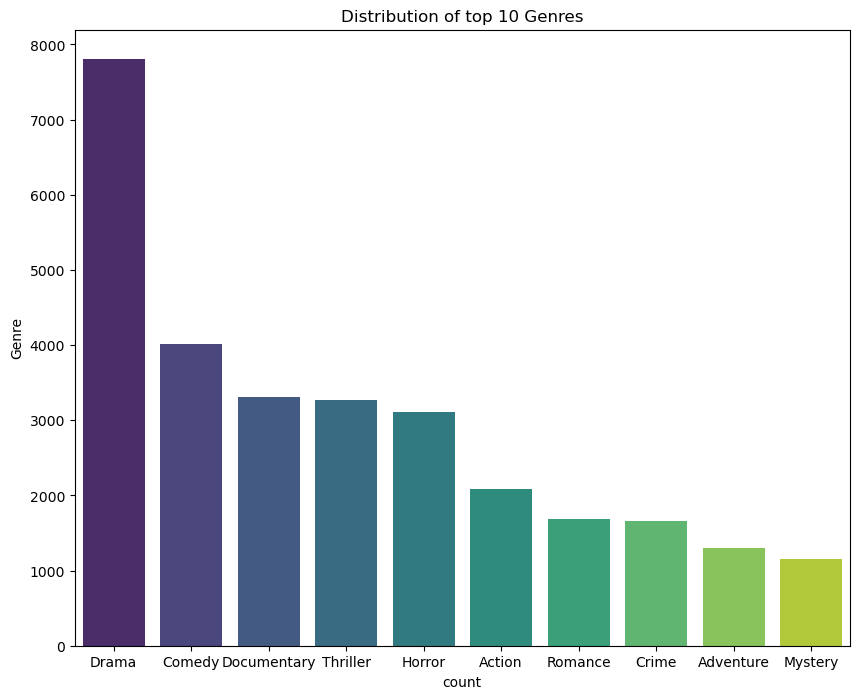

In [181]:
fig, ax = plt.subplots(figsize=(10,8))

#x
x = genre_count['genres'].value_counts()[:10].index
#y
y = genre_count['genres'].value_counts()[:10].values



sns.barplot(x=x,y=y, ax=ax, palette='viridis')
ax.set_xlabel('count')
ax.set_ylabel('Genre')
ax.set_title('Distribution of top 10 Genres');

**Drama (7805), comedy(4014) and Documentary (3304)** are the top watched genres.


#### Language Distribution

In [182]:
# languages used in films
top5_lang = imdb_tm['original_language'].value_counts()[:5]

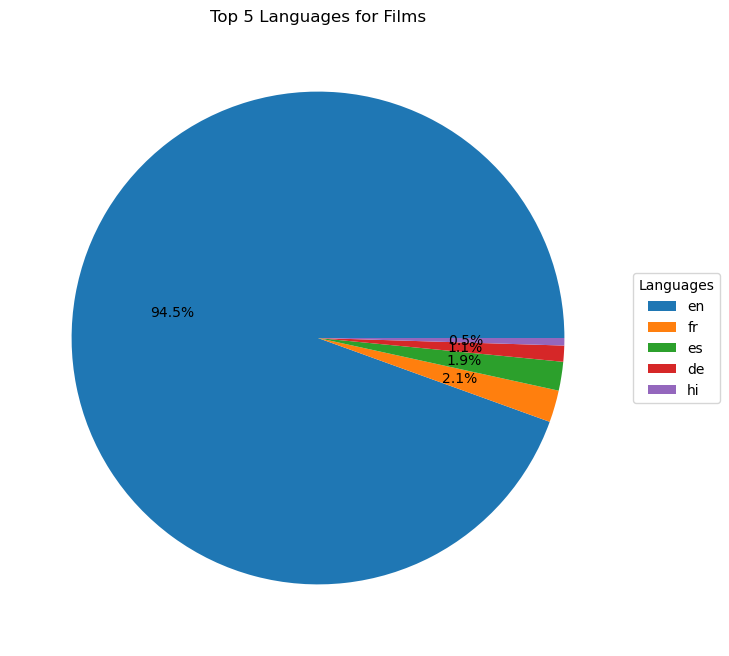

In [192]:
fig, ax = plt.subplots(figsize=(10,8))

ax.pie(top5_lang, autopct='%1.1f%%')
ax.set_title('Top 5 Languages for Films')
ax.legend(labels= top5_lang.index , title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1));

- **94.5%** of the films are in English (en)
- 2.1% are in French (fr)
- 1.9% are in spanish (es)
- 1.1% are in German/Deutsch (de)
- 0.5% are in Hindi (hi)


#### Runtime Minutes

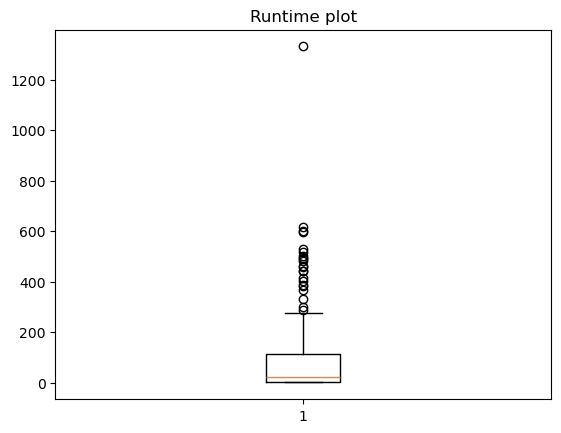

In [196]:
plt.boxplot(imdb_tm['runtime_minutes'].value_counts().values)
plt.title('Runtime plot');

In [43]:
imdb_tm['runtime_minutes'].value_counts().max()

##1331 is an outlier

1331

In [197]:
# Define the bins and labels
bins = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 700]
labels = ['< 60 min', '60-120 min', '120-180 min', '180-240 min', '240-300 min', '300-360 min', '360-420 min', '420-480 min', '480-540 min', '540-600 min', '600-660 min', '660 >']

# Classify the runtime_minutes into the defined bins
min_class = pd.cut(it_merged['runtime_minutes'], bins=bins, labels=labels, right=False)
min_class.value_counts()

runtime_minutes
60-120 min     17038
120-180 min     1293
< 60 min        1078
180-240 min       27
240-300 min        6
300-360 min        4
360-420 min        3
480-540 min        1
420-480 min        0
540-600 min        0
600-660 min        0
660 >              0
Name: count, dtype: int64

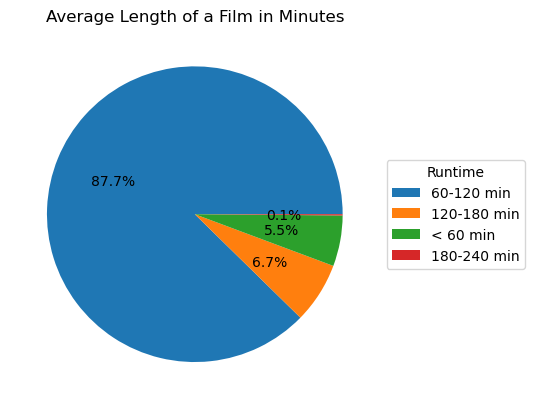

In [200]:
# plot a pie chart for visualization
plt.pie(min_class.value_counts()[:4], autopct='%1.1f%%')
plt.legend(labels=min_class.value_counts()[:4].index, title="Runtime", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Average Length of a Film in Minutes');

- **87.7%** of the films are 60-120 minutes long
- 6.7% of films are 120-180 minutes long
- 5.5% of films are less than 60minutes long
- 0.1% of the films are 180-240 minutes long

#### Average Rating

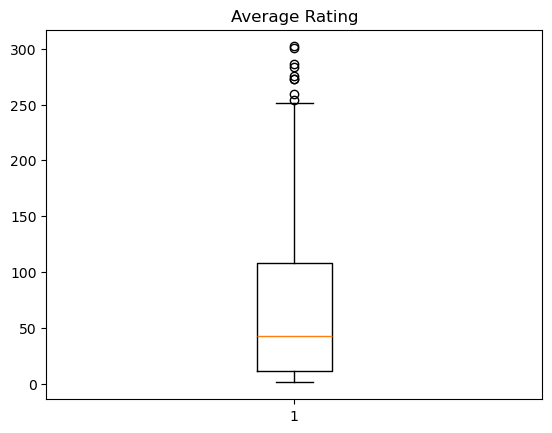

In [201]:
# boxplot for viz
plt.boxplot(imdb_tm['avg_rating'].value_counts())
plt.title('Average Rating');

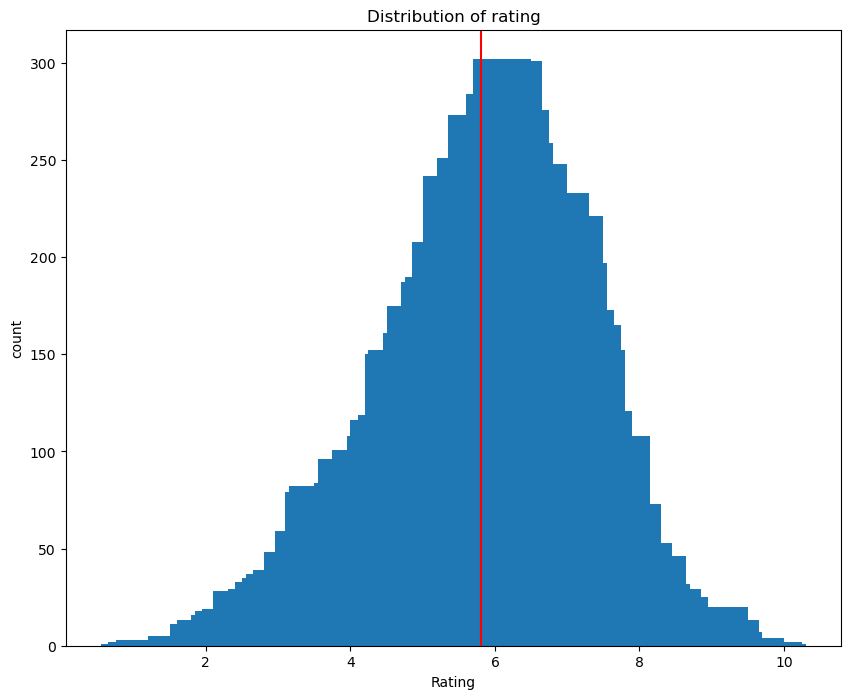

In [202]:
# plot a bar chart to viz the average rating

fig, ax = plt.subplots(figsize=(10,8))

# mean rating
mean_r = imdb_tm['avg_rating'].mean() # 5.81


ax.bar(imdb_tm['avg_rating'].value_counts().index, imdb_tm['avg_rating'].value_counts().values)
ax.axvline(x=mean_r, color='r')
ax.set_xlabel('Rating')
ax.set_ylabel('count')
ax.set_title('Distribution of rating');

- Most films have a 5.8 rating

In [49]:
it_merged['avg_rating'].median()

5.949999999999999

In [50]:
it_merged

,primary_title,original_title,title,genres,original_language,runtime_minutes,popularity,avg_rating,num_votes,release_year
0,The Other Side of the Wind,The Other Side of the Wind,The Other Side of the Wind,Drama,en,122.0,9.800,6.95,4581,2018
1,Foodfight!,Foodfight!,Foodfight!,"Action,Animation,Comedy",en,91.0,4.705,2.00,8294,2013
2,Return to Babylon,Return to Babylon,Return to Babylon,"Biography,Comedy,Drama",en,75.0,0.877,6.45,124,2013
3,Life's a Beach,Life's a Beach,Life's a Beach,Comedy,en,100.0,1.206,3.55,222,2010
4,Dark Blood,Dark Blood,Dark Blood,Thriller,en,86.0,1.721,6.35,1060,2013
...,...,...,...,...,...,...,...,...,...,...
17342,Belonging,Aidiyet,Belonging,"Crime,Drama,Romance",tr,73.0,0.600,5.65,39,2016
17343,Walter,Walter,Walter,Comedy,en,90.0,3.277,5.95,66,2015
17344,Columbus,Columbus,Columbus,Comedy,en,85.0,8.964,6.55,135,2017
17345,Unstoppable,Unstoppable,Unstoppable,Documentary,en,84.0,14.010,7.25,1921,2010


### MULTIVARIATE ANALYSIS

#### Objective 1: To analyze seasonal and monthly trends for movie releases

In [203]:
# Converting release_date to datetime
tn['release_date'] = pd.to_datetime(tn['release_date'], format='%b %d, %Y')

# Extracting year, month, and quarter from release_date
tn['year'] = tn['release_date'].dt.year
tn['month'] = tn['release_date'].dt.month
tn['quarter'] = tn['release_date'].dt.quarter

In [205]:
#convert the currency values to float

tn['production_budget'] = tn['production_budget'].str.replace(',', '').str.replace('$','').astype(float)

tn['worldwide_gross'] = tn['worldwide_gross'].str.replace(',', '').str.replace('$','').astype(float)

tn['domestic_gross'] = tn['domestic_gross'].str.replace(',', '').str.replace('$','').astype(float)
tn

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross,year,month,quarter,season
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,4,Winter
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,2,Spring
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,2,Summer
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,2,Spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,4,Winter
...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018,12,4,Winter
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1999,4,2,Spring
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,7,3,Summer
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,9,3,Fall


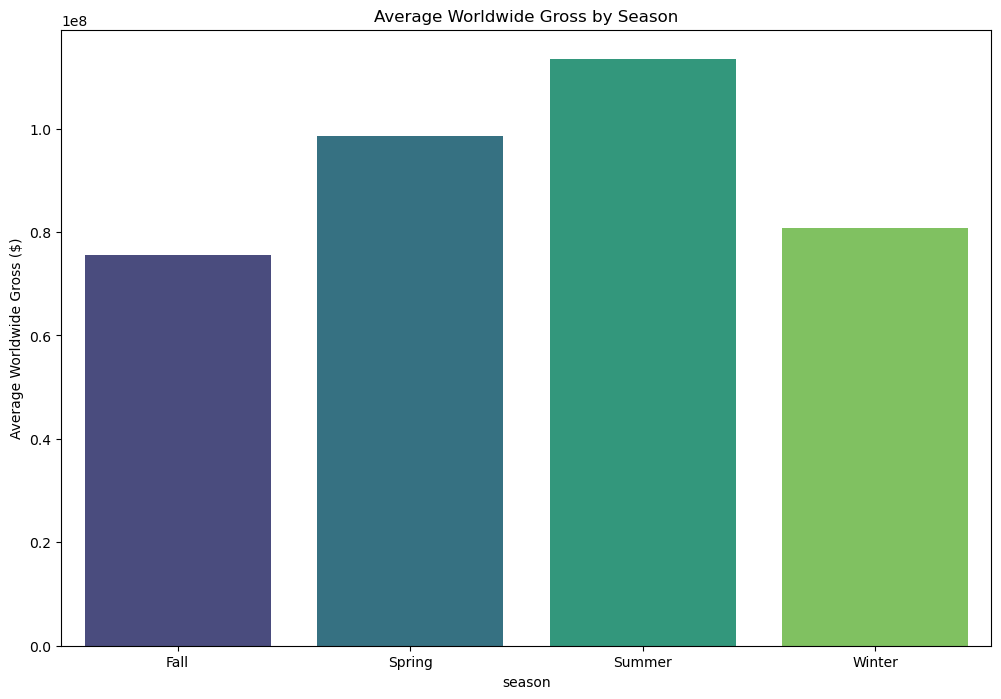

In [206]:
# function to define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

tn['season'] = tn['month'].apply(get_season)

# Aggregatting data by season
seasonal_performance = tn.groupby('season').agg({
    'worldwide_gross': 'mean'
}).reset_index()

# Plotting seasonal performance for worldwide gross
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='season', y='worldwide_gross', data=seasonal_performance, palette='viridis', ax=ax)

plt.title('Average Worldwide Gross by Season')
plt.ylabel('Average Worldwide Gross ($)')
plt.show()

c:\Users\ericm\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ericm\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


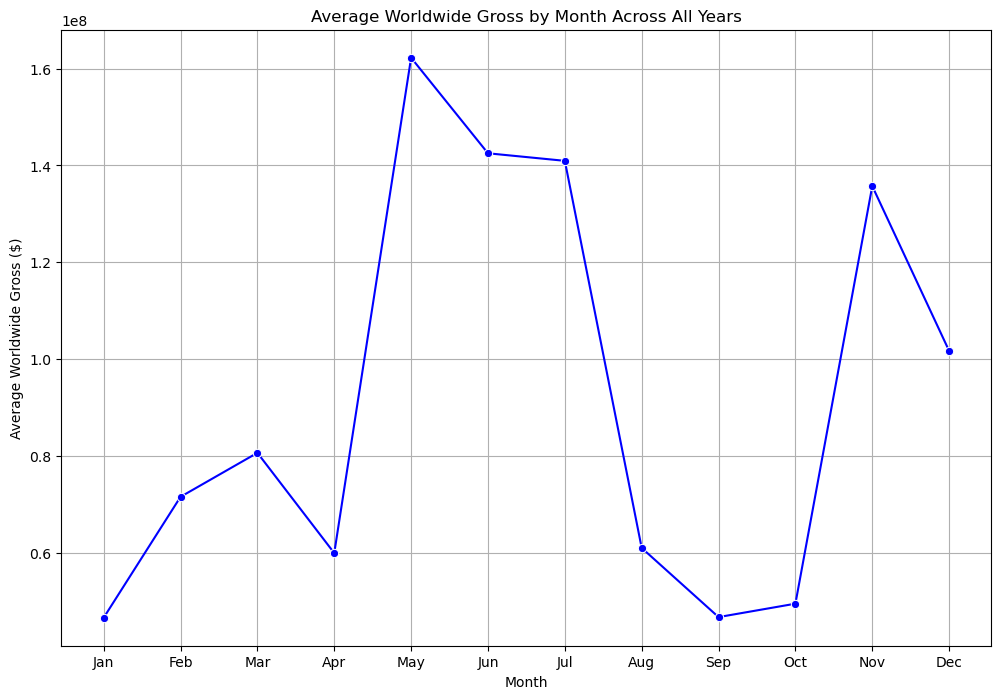

In [208]:
# Visualizing the performance of films released in different months

# Group by month and calculate the average worldwide_gross for each month
monthly_trend = tn.groupby('month').agg({
    'worldwide_gross': 'mean'
}).reset_index()

# Plot the trend of average worldwide gross across the months
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(x='month', y='worldwide_gross', data=monthly_trend, marker='o', color='b', ax=ax)

# Add titles and labels
plt.title('Average Worldwide Gross by Month Across All Years')
plt.xlabel('Month')
plt.ylabel('Average Worldwide Gross ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [210]:
seasonal_performance


,season,worldwide_gross
0,Fall,7.560155e+07
1,Spring,9.853085e+07
2,Summer,1.134543e+08
3,Winter,8.083862e+07


- Most movies perform best in the *summer* with an average worldwide gross of $113M and least in the *fall* averagely $75M

#### Objective 2: To analyze the performance of films in different budget ranges

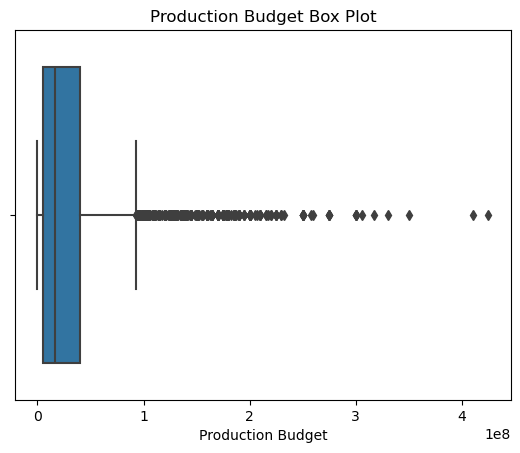

In [212]:
# boxplot viz 
budget_data = tn['production_budget']

sns.boxplot(x = budget_data)
plt.title('Production Budget Box Plot')
plt.xlabel('Production Budget')
plt.show()



In [213]:
# quantiles
q2 = budget_data.median()
q3 = budget_data.quantile(0.75)

print(q2)
print(q3)

17000000.0
40000000.0


In [214]:

# function to define budget ranges and categorize the films
def categorize_budget(budget):
    if budget < q2:
        return 'Low Budget'
    elif q2 <= budget < q3:
        return 'Mid Budget'
    else:
        return 'High Budget'

tn['budget_range'] = tn['production_budget'].apply(categorize_budget)
tn['budget_range']
tn


,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross,year,month,quarter,season,budget_range
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,4,Winter,High Budget
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,2,Spring,High Budget
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,2,Summer,High Budget
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,2,Spring,High Budget
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,4,Winter,High Budget
...,...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018,12,4,Winter,Low Budget
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1999,4,2,Spring,Low Budget
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005,7,3,Summer,Low Budget
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015,9,3,Fall,Low Budget


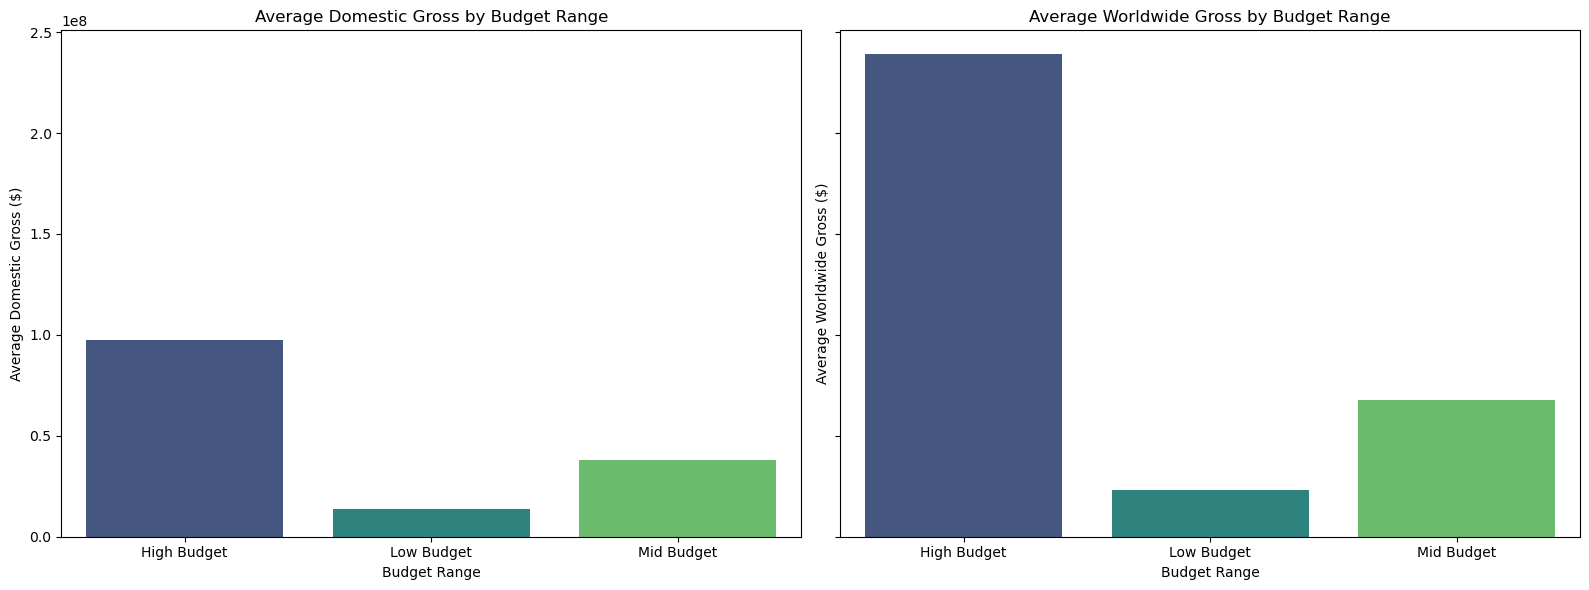

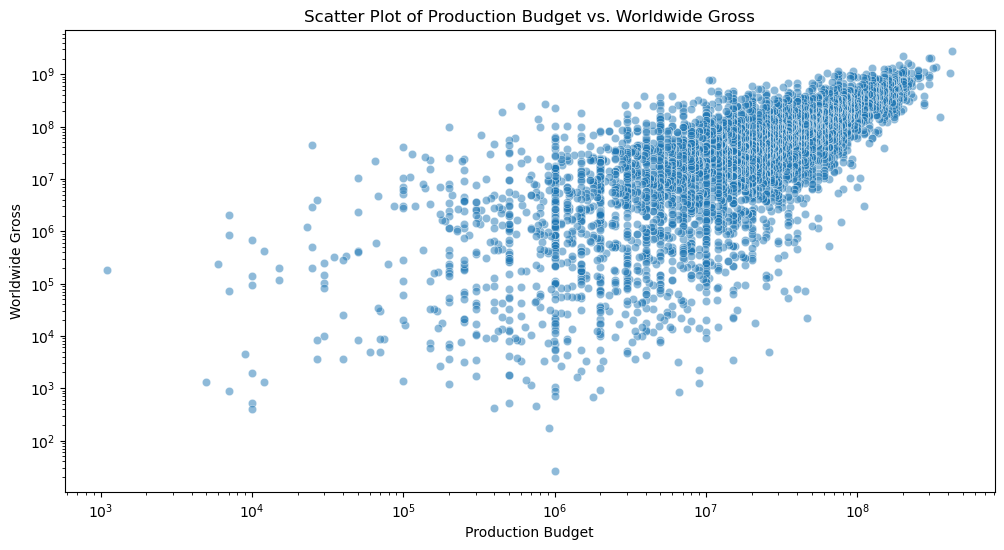

Correlation between Production Budget and Worldwide Gross: 0.75


In [307]:
# Scatter Plot for Production Budget vs. Worldwide Gross
plt.figure(figsize=(12, 6))

# Plot
sns.scatterplot(data=tn, x='production_budget', y='worldwide_gross', alpha=0.5)
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Scatter Plot of Production Budget vs. Worldwide Gross')

# Setting logarithmic scale for better visibility
plt.xscale('log')
plt.yscale('log')

plt.show()

# Calculating the correlation between production budget and worldwide gross
correlation = tn[['production_budget', 'worldwide_gross']].corr().iloc[0, 1]
print(f'Correlation between Production Budget and Worldwide Gross: {correlation:.2f}')

- correlation coefficient of 0.75 suggests a strong positive linear relationship between the the production budget and the worldwide gross.


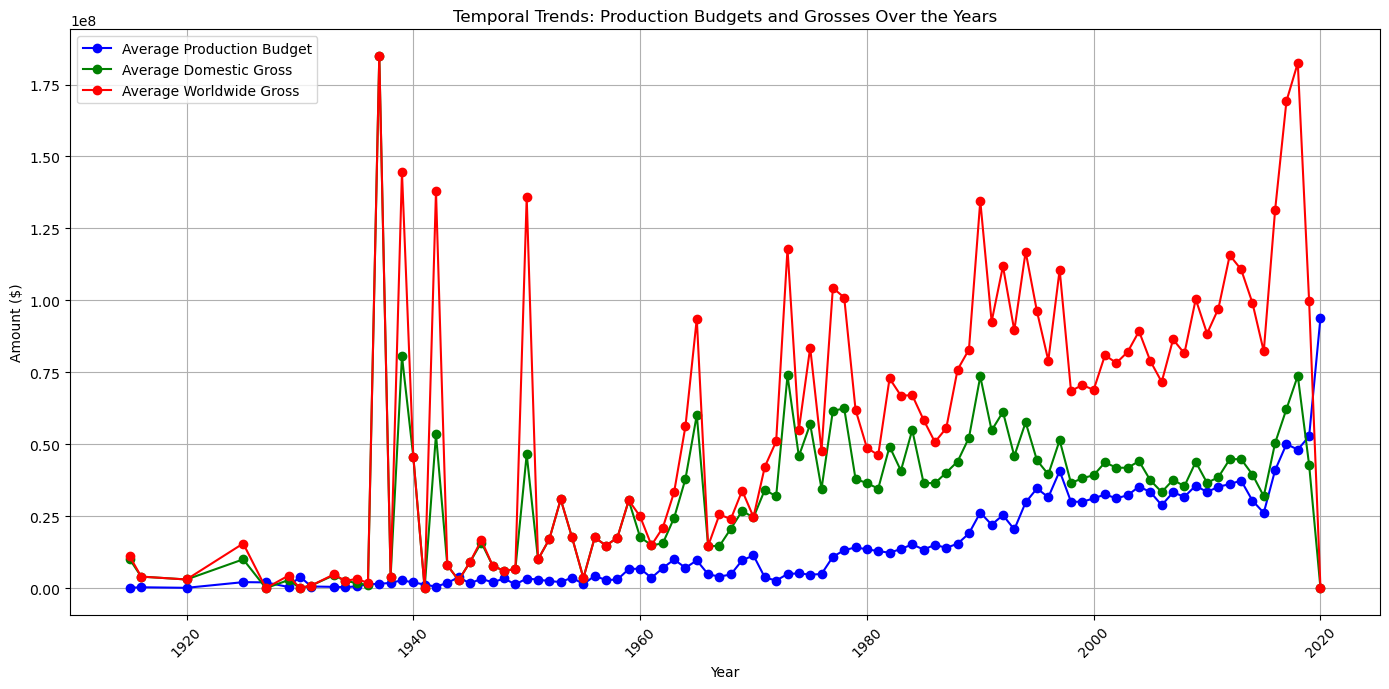

In [308]:
# Group by year and calculate average production budget and grosses
annual_data = tn.groupby('year').agg({
    'production_budget': 'mean',
    'domestic_gross': 'mean',
    'worldwide_gross': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(annual_data['year'], annual_data['production_budget'], marker='o', label='Average Production Budget', color='blue')
plt.plot(annual_data['year'], annual_data['domestic_gross'], marker='o', label='Average Domestic Gross', color='green')
plt.plot(annual_data['year'], annual_data['worldwide_gross'], marker='o', label='Average Worldwide Gross', color='red')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.title('Temporal Trends: Production Budgets and Grosses Over the Years')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The amount spent on production increases as the revenues from the films, over the years.

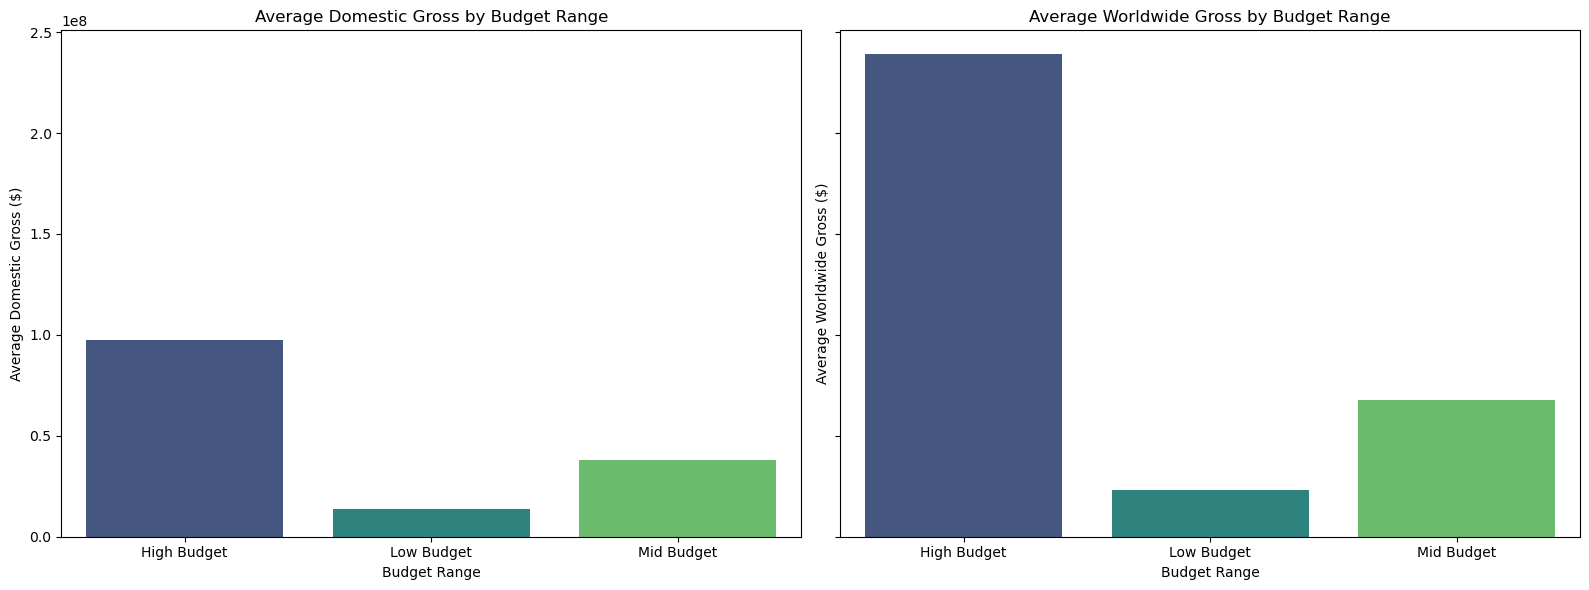

In [309]:
# Analyzing performance metrics by budget range
performance_by_budget = tn.groupby('budget_range').agg({
    'domestic_gross': ['mean', 'median'],
    'worldwide_gross': ['mean', 'median']
}).reset_index()

# Renaming columns
performance_by_budget.columns = ['budget_range', 'avg_domestic_gross', 'median_domestic_gross', 'avg_worldwide_gross', 'median_worldwide_gross']

# Plotting performance metrics by budget range
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
# Domestic Gross
sns.barplot(x='budget_range', y='avg_domestic_gross', data=performance_by_budget, ax=axes[0], palette='viridis')
axes[0].set_title('Average Domestic Gross by Budget Range')
axes[0].set_ylabel('Average Domestic Gross ($)')
axes[0].set_xlabel('Budget Range')
# Worldwide Gross
sns.barplot(x='budget_range', y='avg_worldwide_gross', data=performance_by_budget, ax=axes[1], palette='viridis')
axes[1].set_title('Average Worldwide Gross by Budget Range')
axes[1].set_ylabel('Average Worldwide Gross ($)')
axes[1].set_xlabel('Budget Range')

plt.tight_layout()
plt.show()

- The higher the production budget the higher the returns both domestic ($97M) and worldwide($238M). 

#### Objective 3: To analyze the highly rated Genre

In [314]:
genre_plot = genre_count.groupby('genres').agg({'avg_rating' : 'mean'}).reset_index().sort_values(by='avg_rating', ascending=False)
genre_plot

,genres,avg_rating
16,News,6.993151
7,Documentary,6.886683
4,Biography,6.804939
11,History,6.744615
13,Music,6.650000
20,Sport,6.537465
3,Animation,6.171658
14,Musical,6.137778
22,War,6.132888
8,Drama,5.998110


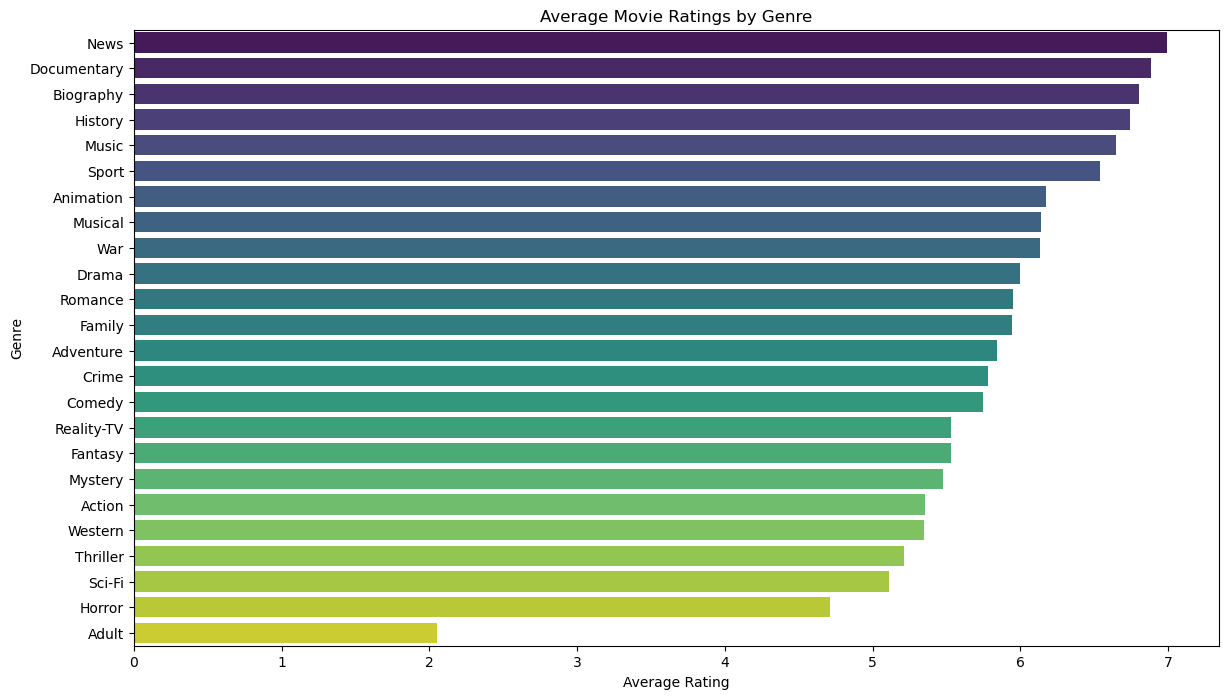

In [315]:
# Plot average ratings by genre
plt.figure(figsize=(14, 8))
sns.barplot(x='avg_rating', y='genres', data=genre_plot, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Movie Ratings by Genre')
plt.show()

- News(6.99), Documentary(6.88) and Biography (6.80) are the highly rated film genres.

#### Objective 4: Identify the Genre with the highest Return on Investment (ROI)

In [260]:
mov_basics = pd.read_sql(
    """
SELECT *
FROM movie_basics

""", conn
)
mov_basics


In [316]:
# subset genres
mov_basics = mov_basics.dropna(subset=['genres'])
# split genres
mov_basics['genres'] = mov_basics['genres'].str.split(',')

# Explode genres into separate rows
mov_basics = mov_basics.explode('genres')


In [300]:
# TOP 10 grossing films
# ROI 
tn['ROI'] = (((tn['worldwide_gross'] - tn['production_budget'])/ tn['production_budget']))* 100


In [305]:
# merge tn and it_merged to compare genre and ROI
genre_roi = tn.merge(mov_basics[['original_title', 'genres']], on='original_title', how='left')
# group genre with roi
gg_roi = genre_roi.groupby('genres')['ROI'].mean().round(2).reset_index().sort_values(by='ROI', ascending=False)

gg_roi 

,genres,ROI
13,Musical,991.36
11,Horror,712.20
14,Mystery,584.23
8,Family,541.58
9,Fantasy,518.61
2,Animation,495.76
20,Thriller,421.61
6,Documentary,414.28
3,Biography,412.20
19,Sport,316.36


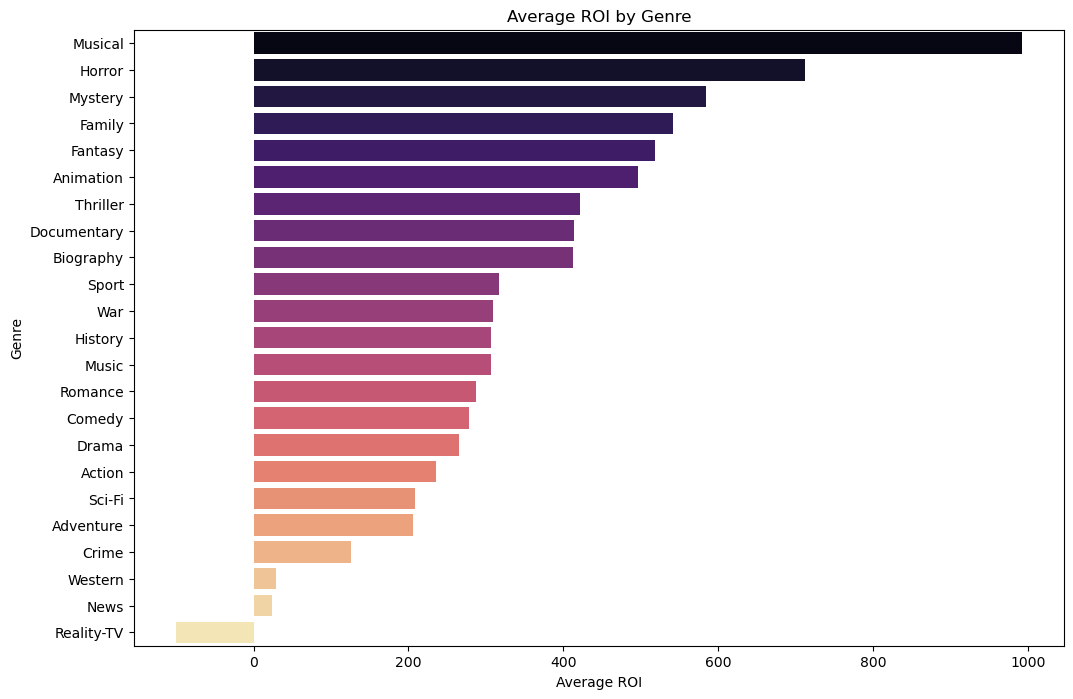

In [289]:
plt.figure(figsize=(12, 8))


sns.barplot(x='ROI', y='genres', data=gg_roi, palette='magma')

plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.title('Average ROI by Genre')
plt.show()

- **Musical films** have the highest return on investment (991.36) followed by horror (712.20) and Mystery (584.23)

In [326]:
x = genre_roi.merge(genre_count[['original_title', 'avg_rating']], on='original_title',how='left' )

grr = x.groupby('genres').agg({'ROI':'mean', 'avg_rating':'mean'}).reset_index()


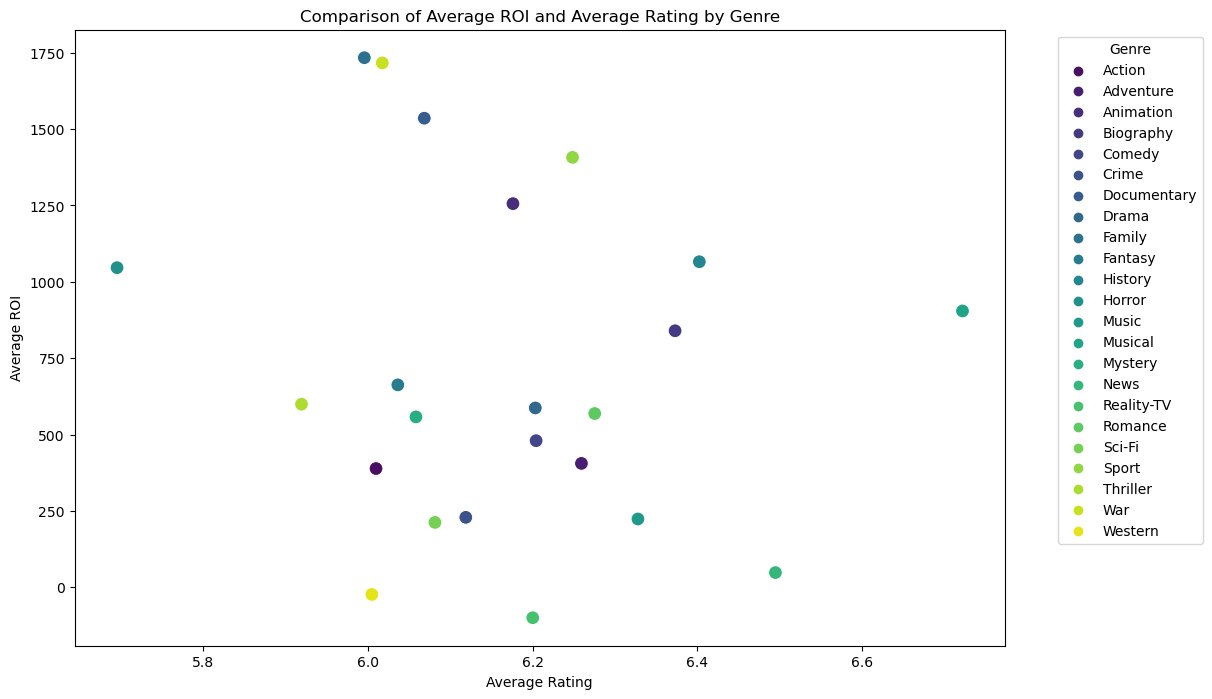

In [327]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_rating', y='ROI', data=grr, hue='genres', palette='viridis', s=100, edgecolor='w')
plt.xlabel('Average Rating')
plt.ylabel('Average ROI')
plt.title('Comparison of Average ROI and Average Rating by Genre')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')